In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

np.random.seed(1)

In [4]:
X, y = make_classification(n_samples=100, n_features=8, 
                          n_classes=4, n_informative=4, 
                           n_clusters_per_class=1, n_redundant=4,
                          random_state=1)

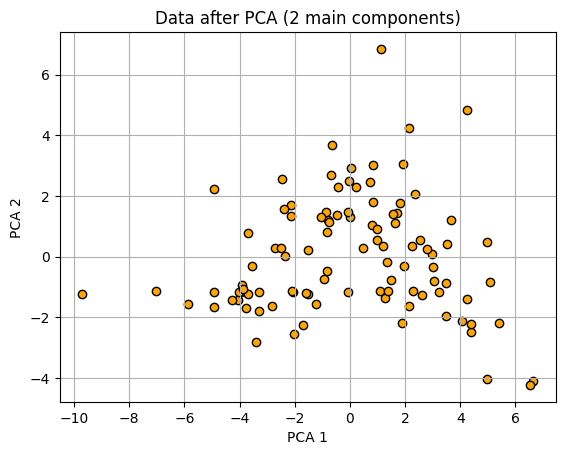

In [6]:

# Шаг 2: Центрирование данных (вычитание среднего по каждому признаку)

X_mean = np.mean(X, axis=0)
X_centered = X - X_mean


# Шаг 3: Построение ковариационной матрицы

cov_matrix = np.cov(X_centered, rowvar=False)


# Шаг 4: Нахождение собственных значений и собственных векторов
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)



# Шаг 5: Сортировка собственных значений и векторов
sorted_indices = np.argsort(eigenvalues)[::-1]  # Сортировка по убыванию
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Шаг 6: Выбор количества главных компонент (например, 2)
k = 2  # Сохраним 2 главные компоненты
top_eigenvectors = eigenvectors[:, :k]

# Шаг 7: Проекция данных на новые оси
X_pca = np.dot(X_centered, top_eigenvectors)


# Визуализация результата
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='orange', edgecolor='k')
plt.title("Data after PCA (2 main components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()


In [19]:
x_transform.shape

(100, 2)

In [69]:
pca_from_sklearn = PCA(n_components=2, svd_solver='full')
pca_from_sklearn.fit(X)

PCA(n_components=2, svd_solver='full')

In [70]:
x_transform = pca_from_sklearn.fit_transform(X)
print(sum(pca_from_sklearn.explained_variance_ratio_))

0.7308963537025673


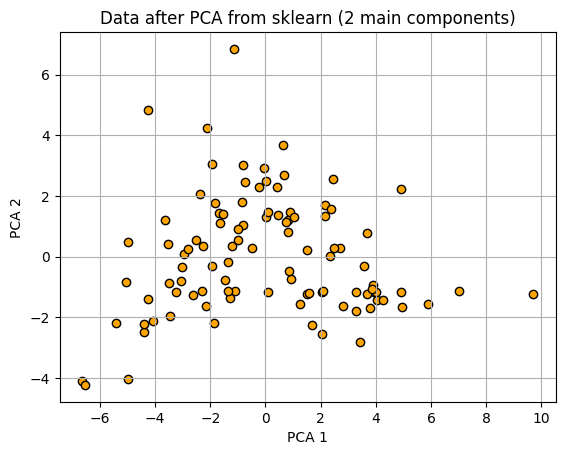

In [12]:
plt.scatter(x_transform[:, 0], x_transform[:, 1], c='orange', edgecolor='k')
plt.title("Data after PCA from sklearn (2 main components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model_logistic_R = LogisticRegression()
model_logistic_R.fit(x_new, y)

LogisticRegression()

In [65]:
print(model_logistic_R.score(x_new, y))

0.78


In [66]:
model_logistic_R2 = LogisticRegression()
model_logistic_R2.fit(x_transform, y)

LogisticRegression()

In [67]:
print(model_logistic_R2.score(x_transform, y))


0.78


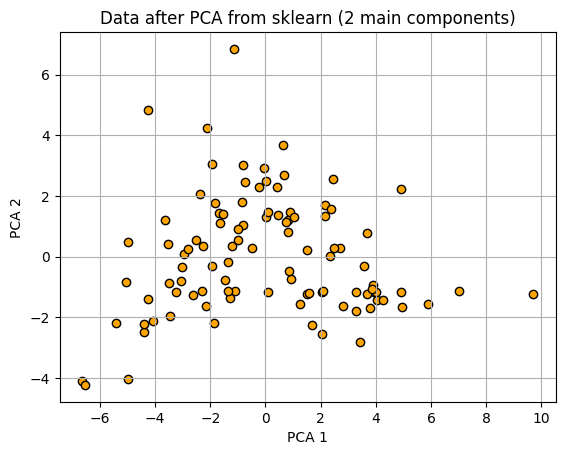

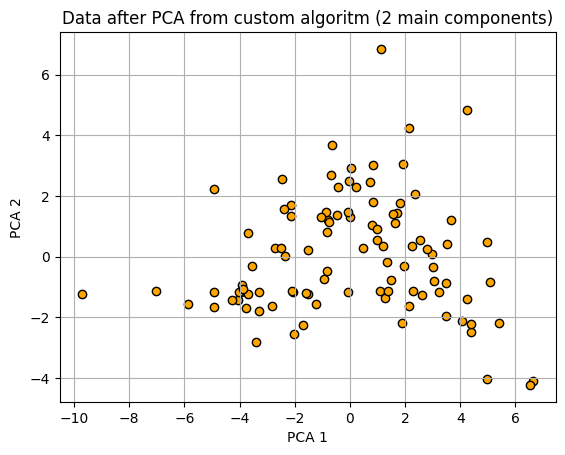

In [68]:
plt.scatter(x_transform[:, 0], x_transform[:, 1], c='orange', edgecolor='k')
plt.title("Data after PCA from sklearn (2 main components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()



plt.scatter(x_new[:, 0], x_new[:, 1], c='orange', edgecolor='k')
plt.title("Data after PCA from custom algoritm (2 main components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()